In [27]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

X_train, _ = make_blobs(n_samples=26, centers=2, n_features=2, random_state=20)

In [4]:
df=pd.read_csv('E:/Work/JIIT/sem_6/JIIT-SEM-6/DataMining&WebAlgorithms/Lab7/q1.csv');
df.head()

,point,x,y
0,a,4.09,8.06
1,b,4.08,10.02
2,c,4.07,12.01
3,d,12.51,12.54
4,e,12.03,12.04


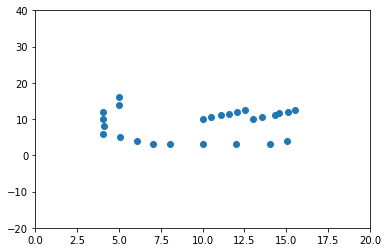

In [9]:
from matplotlib import pyplot as plt
# plt.scatter(x,y, c = "red",alpha=.5, marker = 'o')
plt.scatter(df['x'],df['y'])
plt.xlim(0,20)
plt.ylim(-20,40)
plt.show()

Helper functions for K-means

In [10]:
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)


In [11]:
def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

In [12]:
def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

In [13]:
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

In [14]:
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

In [28]:
def show_clusters(X, cluster, cg):
    df1 = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df1.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

K-means

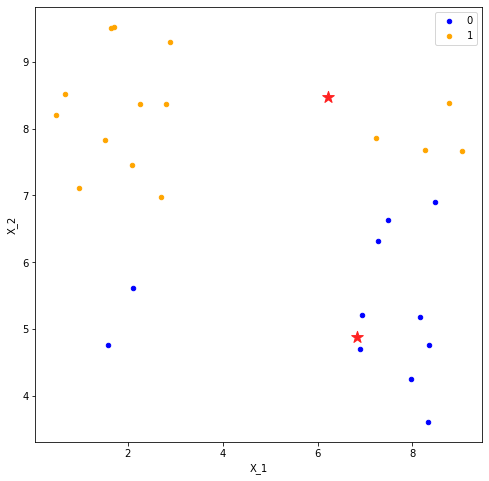

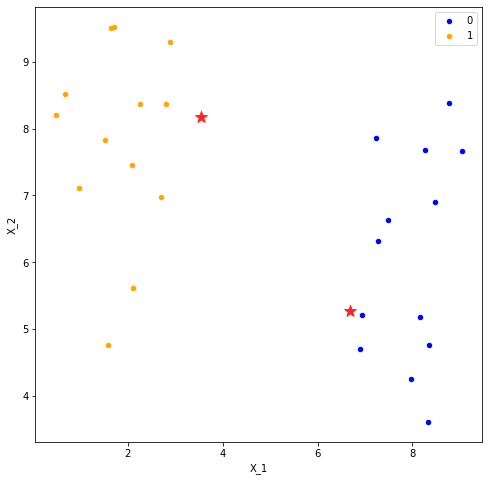

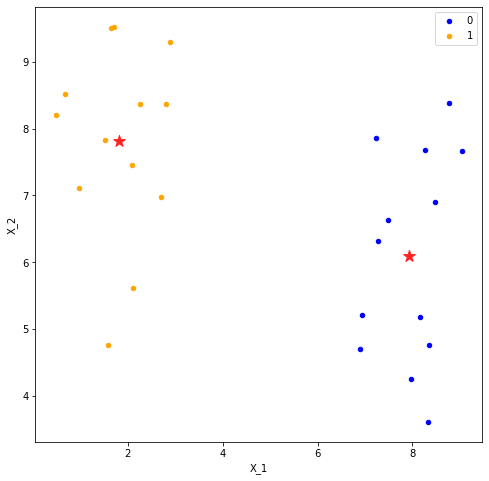

In [31]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

cluster = k_means(2, X_train)